In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnD             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
unique_states = df['State'].unique()
state_numbers = [1,2,3]
df.replace(unique_states,state_numbers,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnD             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     int64  
 4   Profit          50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [10]:
 for column in df.columns:
    corr = np.corrcoef(df['Profit'],df[column])
    print(f"Correlation between Profit and {column} = {corr[0][1]}")

Correlation between Profit and RnD = 0.9729004656594831
Correlation between Profit and Administration = 0.2007165682687213
Correlation between Profit and Marketing = 0.7477657217414766
Correlation between Profit and State = 0.048470971815370675
Correlation between Profit and Profit = 1.0


In [11]:
x = df.drop(['Profit','State'],axis=1)
y = df['Profit']

In [12]:
len(x)
len(y)

50

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [19]:
y_prediction = model.predict(x_test)

In [20]:
print(y_prediction)

[164221.28864591 135818.71408122 172867.18058898  59239.07040499
 114893.57331974  96792.62771379 129094.58591391 129249.19527203
 189719.84523299  45349.98176548]


In [21]:
print(x_test)

          RnD  Administration  Marketing
5   131876.90        99814.71  362861.36
11  100671.96        91790.61  249744.55
4   142107.34        91391.77  366168.42
43   15505.73       127382.30   35534.17
22   73994.56       122782.75  303319.26
31   61136.38       152701.92   88218.23
12   93863.75       127320.38  249839.44
18   91749.16       114175.79  294919.57
1   162597.70       151377.59  443898.53
47       0.00       135426.92       0.00


In [22]:
print(y_test)

5     156991.12
11    144259.40
4     166187.94
43     69758.98
22    110352.25
31     97483.56
12    141585.52
18    124266.90
1     191792.06
47     42559.73
Name: Profit, dtype: float64


Text(0.5, 1.0, 'RnD Vs Profit')

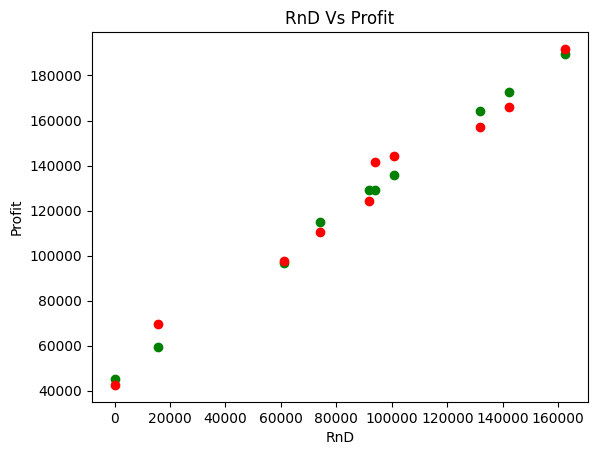

In [23]:
plt.scatter(x_test['RnD'],y_prediction,color='Green')
plt.scatter(x_test['RnD'],y_test,color='Red')
plt.xlabel('RnD')
plt.ylabel('Profit')
plt.title("RnD Vs Profit")

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
MAE = mean_absolute_error(y_test, y_prediction)
print(f"Mean Absolute Error value = {MAE}")

Mean Absolute Error value = 6043.795624525121


In [27]:
MSE = mean_squared_error(y_test, y_prediction)
print(f"Mean Squared Error value = {MSE}")

Mean Squared Error value = 49282855.455521815


In [ ]:
rmse = np.sqrt(MSE)
print(f"Mean Absolute Error value = {MAE}")